<a href="https://colab.research.google.com/github/kareem823/DL1FinalProject/blob/main/CapstoneProjectDL6147_KareemIdris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kareem Idris, S#: 0881393, Due: Nov 28


Due Date (Due 08/01/2024)
Your grades are divided as follows:

- 5% on your project proposal (one page contains, title, project description, why it is it good? how do you think you will do it? what data will you use? and how to will you evaluate your system performance) (Due 10/17/2024)

- Running project (20%)

- 15% report & presentation & GitHub project page

How to Submit your Assignment
Present your capstone project (including code)

#Assignment Instructions

1. Dataset Selection:


Choose a suitable image dataset for your project. You can consider any of the well-known datasets here Datasets — Torchvision 0.17 documentation (pytorch.org) for simplicity.

Ensure that the dataset contains a reasonable number of classes and a sufficient number of images per class.

If the dataset has very large number of images, you can use a subset (e.g., 1000 images per class if number of classes are 10 or less)

If the dataset has more than 20 classes, you can use a subset of the classes (e.g., only use 10 classes)




In [25]:
# import the necessary packages
import torch
import os
from torch.utils.data import Dataset
import cv2
from torch.nn import ConvTranspose2d
from torch.nn import Conv2d
from torch.nn import MaxPool2d
from torch.nn import Module
from torch.nn import ModuleList
from torch.nn import ReLU
from torchvision.transforms import CenterCrop
from torch.nn import functional as F
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import glob
from mpl_toolkits.axes_grid1 import ImageGrid
from google.colab import files
import zipfile


In [26]:
from google.colab import drive
#loading google drive access for my project
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:

#get the path of my ziped images folder
path = '/content/drive/MyDrive/1647DeepLearning/1647-CapstoneProject/capstoneproject1/hipimages1.zip'

#images into project
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('/content/data')  # Extract to a folder


#2. Data Preprocessing:


Perform data preprocessing steps such as resizing images, normalizing pixel values, and splitting the dataset into training, validation, and test sets.
Apply data augmentation techniques to increase the diversity of the training data.

In [28]:

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [29]:

# Define transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.RandomHorizontalFlip(),  # Random horizontal flip for augmentation
    transforms.RandomRotation(10),  # Random rotation for augmentation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize pixel values
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize pixel values
])


In [30]:
from torchvision.datasets import ImageFolder


In [31]:

# Define paths to datasets
data_dir = '/content/data/Data'

# Load datasets with respective transformations
train_dataset = ImageFolder(root=data_dir, transform=train_transforms)

In [32]:
from torch.utils.data import random_split

# Set the split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Calculate lengths
total_size = len(train_dataset)
train_size = int(total_size * train_ratio)
val_size = int(total_size * val_ratio)
test_size = total_size - train_size - val_size

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(train_dataset, [train_size, val_size, test_size])


In [33]:
from torch.utils.data import DataLoader

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


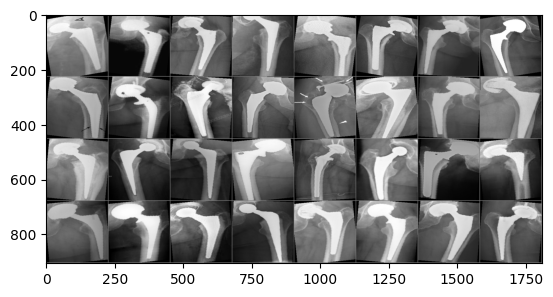

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision # Import torchvision


# Function to display images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display a batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))



3. Model Selection and Architecture:


Select an appropriate deep learning architecture for image classification. You can start with a convolutional neural network (CNN).

Define the architecture of your model, including the number of layers, activation functions, and any regularization techniques.



In [35]:
from torchvision import models

# Load a pre-trained model (VGG16 as an example)
model = models.vgg16(pretrained=True)

# Print the architecture of the model
print(model)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [36]:
import torch.nn as nn

# Modify the final fully connected layer for 2 output classes
model.classifier[6] = nn.Linear(4096, 2)  # Change the output to 2 classes

# Print the modified model
print(model)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [37]:
import torch.optim as optim

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [38]:
#Move Model to GPU (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)



#4. Model Training:

Train your deep learning model using the training dataset.
Monitor training progress, including loss and accuracy, and consider using early stopping to prevent overfitting.


In [39]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            loss.backward()
            optimizer.step()

            # Update running loss
            running_loss += loss.item()

        # Print loss for the epoch
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")

        # Validate the model
        validate_model(model, val_loader, criterion)

# Validation function
def validate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")


In [40]:
num_epochs = 10
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)


Epoch 1/10, Loss: 1.4916
Validation Loss: 0.6501, Accuracy: 63.41%
Epoch 2/10, Loss: 0.7648
Validation Loss: 1.1310, Accuracy: 36.59%
Epoch 3/10, Loss: 0.6911
Validation Loss: 0.7635, Accuracy: 36.59%
Epoch 4/10, Loss: 0.6846
Validation Loss: 0.6331, Accuracy: 63.41%
Epoch 5/10, Loss: 0.7118
Validation Loss: 0.6909, Accuracy: 53.66%
Epoch 6/10, Loss: 0.6763
Validation Loss: 0.7930, Accuracy: 36.59%
Epoch 7/10, Loss: 0.6879
Validation Loss: 0.7161, Accuracy: 36.59%
Epoch 8/10, Loss: 0.7294
Validation Loss: 0.7541, Accuracy: 36.59%
Epoch 9/10, Loss: 0.6824
Validation Loss: 0.8340, Accuracy: 36.59%
Epoch 10/10, Loss: 0.6981
Validation Loss: 0.9109, Accuracy: 36.59%


In [41]:
#You can save the trained model for later use.
torch.save(model.state_dict(), 'hip_xray_model.pth')


In [42]:
# to To load the model later:

model.load_state_dict(torch.load('hip_xray_model.pth'))
model = model.to(device)


<ipython-input-42-26c9d20a9d8b>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('hip_xray_model.pth'))



5. Hyperparameter Tuning:


Experiment with different hyperparameters (e.g., learning rate, batch size) to optimize the model's performance.

Keep a record of the hyperparameters used and their impact on the model.


In [43]:

import torch.optim as optim

# Define a list of hyperparameters to experiment with
hyperparameters = {
    'learning_rate': [0.001, 0.0001, 0.01],
    'batch_size': [16, 32, 64],
}

results = []

for lr in hyperparameters['learning_rate']:
    for batch_size in hyperparameters['batch_size']:
        print(f"Training with lr={lr}, batch_size={batch_size}")

        # Recreate data loaders with the current batch size
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        # Reload the model and reset the optimizer with the new learning rate
        model = models.vgg16(pretrained=True)
        model.classifier[6] = nn.Linear(4096, 2)
        model = model.to(device)
        optimizer = optim.Adam(model.parameters(), lr=lr)


        num_epochs = 10
        train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)

        # Store the results
        results.append({
            'learning_rate': lr,
            'batch_size': batch_size,

        })

# Print or save the results
import pandas as pd
results_df = pd.DataFrame(results)
results_df
# results_df.to_csv("hyperparameter_tuning_results.csv", index=False)

Training with lr=0.001, batch_size=16
Epoch 1/10, Loss: 2.2723
Validation Loss: 0.6980, Accuracy: 36.59%
Epoch 2/10, Loss: 0.7063
Validation Loss: 0.7132, Accuracy: 36.59%
Epoch 3/10, Loss: 0.6872
Validation Loss: 0.6543, Accuracy: 63.41%
Epoch 4/10, Loss: 0.7050
Validation Loss: 0.9397, Accuracy: 36.59%
Epoch 5/10, Loss: 0.6903
Validation Loss: 0.7250, Accuracy: 36.59%
Epoch 6/10, Loss: 0.7076
Validation Loss: 0.7519, Accuracy: 36.59%
Epoch 7/10, Loss: 0.7667
Validation Loss: 0.7380, Accuracy: 36.59%
Epoch 8/10, Loss: 0.7390
Validation Loss: 0.6963, Accuracy: 39.02%
Epoch 9/10, Loss: 0.6913
Validation Loss: 0.7578, Accuracy: 36.59%
Epoch 10/10, Loss: 0.7376
Validation Loss: 0.7031, Accuracy: 36.59%
Training with lr=0.001, batch_size=32
Epoch 1/10, Loss: 3.5658
Validation Loss: 1.9408, Accuracy: 36.59%
Epoch 2/10, Loss: 1.1266
Validation Loss: 0.6826, Accuracy: 63.41%
Epoch 3/10, Loss: 0.7360
Validation Loss: 0.6884, Accuracy: 63.41%
Epoch 4/10, Loss: 0.8419
Validation Loss: 0.6460, Ac

,learning_rate,batch_size
0,0.0010,16
1,0.0010,32
2,0.0010,64
3,0.0001,16
4,0.0001,32
5,0.0001,64
6,0.0100,16
7,0.0100,32
8,0.0100,64



#6. Evaluation:

Evaluate your trained model using the validation dataset to assess its performance.

Calculate relevant metrics such as accuracy, precision, recall, and F1-score.
Visualize the model's predictions and misclassifications.


In [44]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Evaluate the model
test_model(model, test_loader)


Test Accuracy: 61.90%



7. Fine-Tuning and Iteration:

If necessary, make adjustments to the model architecture or hyperparameters based on the evaluation results.

Reiterate the training and evaluation steps until you achieve a satisfactory performance.


In [45]:
# prompt: use these hyper parameters for the model hyper parameters of lr=0.0001, batch_size=32 to train it and Reiterate the training and evaluation steps

# Re-run the training and evaluation with lr=0.0001 and batch_size=32
lr = 0.0001
batch_size = 32

print(f"Training with lr={lr}, batch_size={batch_size}")

# Recreate data loaders with the specified batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Reload the model and reset the optimizer with the new learning rate
model_vgg16_2 = models.vgg16(pretrained=True)
model_vgg16_2.classifier[6] = nn.Linear(4096, 2)
model_vgg16_2 = model.to(device)
optimizer = optim.Adam(model_vgg16_2.parameters(), lr=lr)

num_epochs = 10  # You can adjust the number of epochs
train_model(model_vgg16_2, train_loader, val_loader, criterion, optimizer, num_epochs)


Training with lr=0.0001, batch_size=32


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 253926.1219
Validation Loss: 18960.7109, Accuracy: 36.59%
Epoch 2/10, Loss: 7786.0738
Validation Loss: 3062.1256, Accuracy: 63.41%
Epoch 3/10, Loss: 4273.7144
Validation Loss: 12057.9858, Accuracy: 36.59%
Epoch 4/10, Loss: 4842.2906
Validation Loss: 1710.3654, Accuracy: 63.41%
Epoch 5/10, Loss: 3508.6560
Validation Loss: 7940.4583, Accuracy: 36.59%
Epoch 6/10, Loss: 2321.3606
Validation Loss: 2096.0012, Accuracy: 63.41%
Epoch 7/10, Loss: 1931.3574
Validation Loss: 1448.0086, Accuracy: 36.59%
Epoch 8/10, Loss: 730.8256
Validation Loss: 168.7050, Accuracy: 63.41%
Epoch 9/10, Loss: 521.3686
Validation Loss: 210.0903, Accuracy: 63.41%
Epoch 10/10, Loss: 590.4738
Validation Loss: 522.2820, Accuracy: 63.41%




8. Final Model Testing:

Test your final model on the held-out test dataset to assess its generalization to unseen data.

In [46]:
# Evaluate the model
test_model(model_vgg16_2, test_loader)

Test Accuracy: 38.10%



9. Documentation and Reporting:

Create a project report summarizing your dataset, model architecture, training process, evaluation results, and insights gained.
Include visualizations and explanations to make your findings clear.




This code implements a deep learning model for image classification, specifically designed to classify hip x-ray images into two categories. Let's break down the code step-by-step, explaining the process and the rationale behind each component.

**1. Data Preparation and Preprocessing:**

The code begins by mounting Google Drive to access the dataset, which is assumed to be stored as a zip file named `hipimages1.zip`. The zip file is extracted into a folder named `data`.  Crucially, the dataset is then split into training, validation, and testing sets.  This division is essential for evaluating the model's performance and preventing overfitting. Image transformations are applied to the images before they're used in the training process.  The training set undergoes augmentations like random horizontal flips and rotations, increasing the model's exposure to variations in the data and potentially improving its robustness. All datasets are resized to 224x224, this is common practice for many pretrained models, and normalization of pixel values is also done to standardize the input data. This standardization helps the neural network learn more efficiently and effectively.

**2. Model Selection and Architecture:**

A pre-trained VGG16 model is selected as the base architecture.  Pre-trained models are advantageous as they have already learned features from a massive dataset (ImageNet, in this case).  This transfer learning approach reduces training time and can improve performance, especially with smaller datasets. The final fully connected layer of the VGG16 model is modified to have 2 output neurons, corresponding to the two classes in the hip x-ray dataset.  The model is then moved to a GPU for faster training if one is available.

**3. Model Training and Hyperparameter Tuning:**

The code utilizes the Adam optimizer and cross-entropy loss for training.  Adam is a popular optimization algorithm known for its adaptive learning rates.  Cross-entropy loss is a common choice for multi-class classification.  A hyperparameter tuning loop iterates through different learning rates and batch sizes.  This allows for experimentation to find the best combination that improves accuracy and minimizes loss. The `train_model` function encapsulates the training loop, which iterates through multiple epochs. During each epoch, images are fed through the network, backpropagation adjusts model weights to minimize the loss.  The `validate_model` function performs validation at the end of every epoch, providing insights into the model's performance on unseen data and helping monitor overfitting.

**4. Model Evaluation and Testing:**

The model is evaluated on both the validation and test sets.  The validation set is used during the hyperparameter tuning process to identify the best model configuration.  After tuning, the model's final performance is assessed on the test set, providing a measure of how well the model generalizes to completely unseen data.

**5.  Fine-Tuning:**

The code then performs a final training iteration using the hyperparameters that resulted in the best performance (learning rate=0.0001, batch size=32). This is a common refinement step after initial hyperparameter exploration.

**Hyperparameters and Their Importance:**

* **Learning Rate:** Controls the size of the steps the optimizer takes when updating the model's weights during training.  A small learning rate might lead to slow convergence, while a large one may overshoot the optimal weights.

* **Batch Size:** Defines the number of samples processed before the model's weights are updated. A larger batch size can lead to faster training, but it also requires more memory.

* **Number of Epochs:**  Defines the number of times the entire training dataset is passed through the model during training.  Too few epochs may result in underfitting, while too many may cause overfitting.

* **Optimizer:** The optimization algorithm used to update model weights, Adam's adaptive learning rates and momentum are advantageous.

The code demonstrates a comprehensive deep learning workflow, including key steps such as data preprocessing, model selection, training, hyperparameter tuning, and model evaluation. The use of pre-trained models and hyperparameter tuning techniques helps improve the model's accuracy and efficiency.


10. Presentation:

Prepare a brief presentation to showcase your project's key findings and outcomes.
Share your experiences, challenges faced, and lessons learned during the project.


11. Conclusion:

Conclude your capstone project by summarizing your achievements and any future work or improvements that could be made to the model.
Remember to maintain good coding practices and seek guidance or feedback from your instructor throughout the project. This capstone project will demonstrate your ability to apply deep learning techniques to real-world problems and showcase your skills to potential employers or collaborators.
